In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore
import matplotlib.dates as mdates

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [28]:
df = pd.read_csv("../data/benin-malanville.csv", parse_dates=["Timestamp"])
df = df.sort_values("Timestamp").reset_index(drop=True)
print("Data loaded successfully:", df.shape)
display(df.head())

Data loaded successfully: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


Dataset shape: (525600, 19)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cle

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN



Missing values per column:


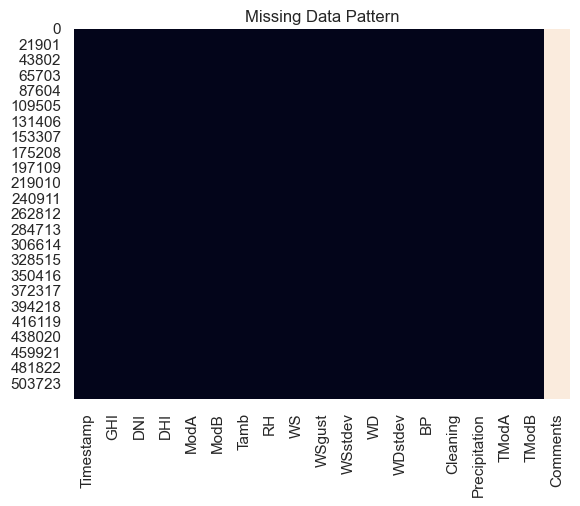

In [29]:
print("Dataset shape:", df.shape)
print("\nColumn information:")
df.info()

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values per column:")
df.isna().sum()

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Pattern")
plt.show()

In [30]:
# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Detect outliers
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

#before
print("Before cleaning:", df.shape)
# Remove outliers
df_clean = df[~outliers]
#after
print("After cleaning:", df_clean.shape)
print(f"Removed {outliers.sum()} outliers. Clean dataset shape: {df_clean.shape}")

Before cleaning: (525600, 19)
After cleaning: (507757, 19)
Removed 17843 outliers. Clean dataset shape: (507757, 19)


⏰ TIME SERIES ANALYSIS
1. PREPARING TIME SERIES DATA:


C:\Users\Kifiya\AppData\Local\Temp\ipykernel_7268\1127790105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


   - Time range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
   - Total duration: 364 days

2. SOLAR RADIATION TIME SERIES:


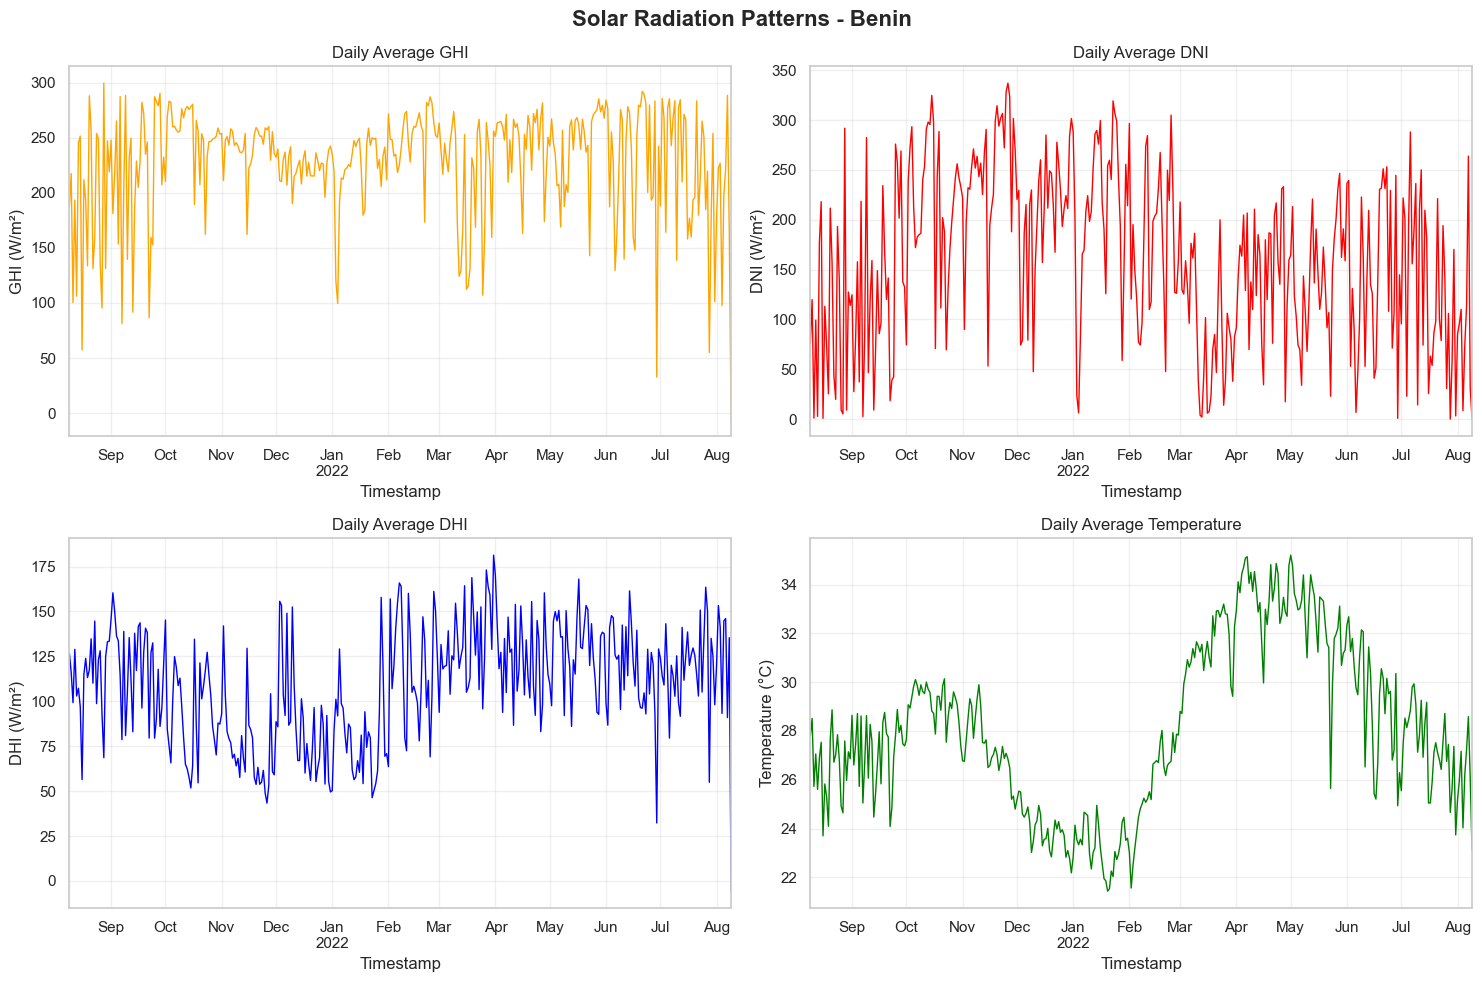


3. SEASONAL PATTERNS:


C:\Users\Kifiya\AppData\Local\Temp\ipykernel_7268\1127790105.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean.index.month


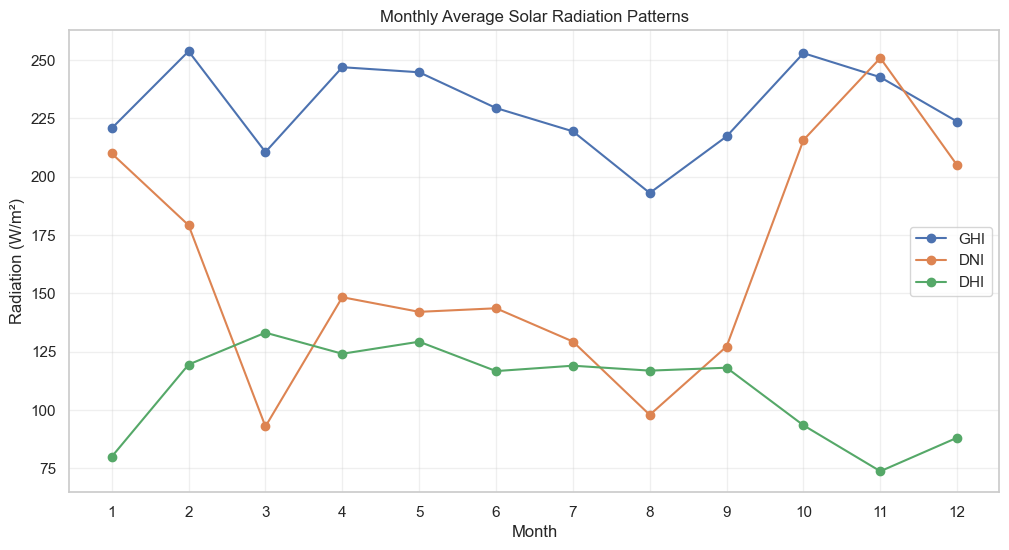


4. DAILY PATTERNS:


C:\Users\Kifiya\AppData\Local\Temp\ipykernel_7268\1127790105.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hour'] = df_clean.index.hour


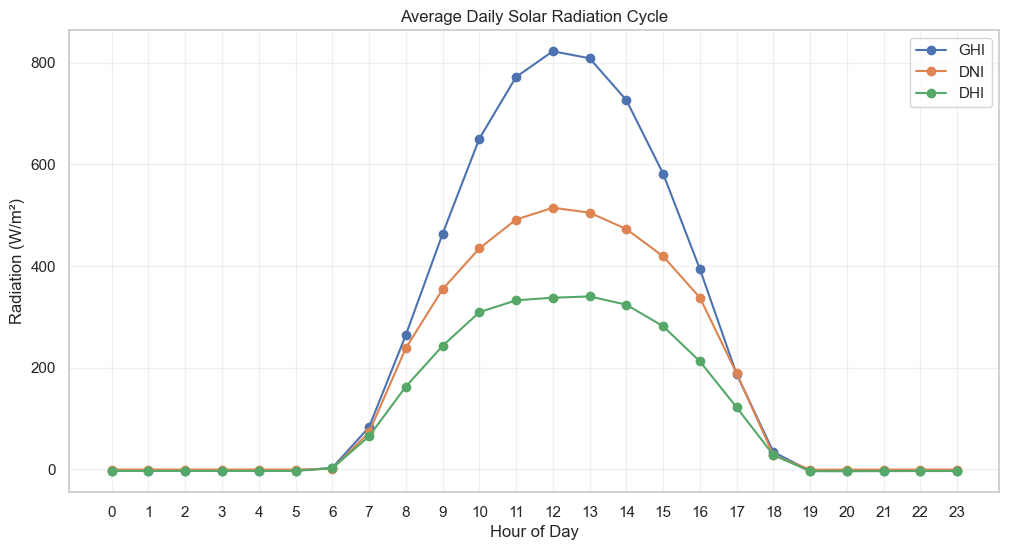

In [31]:
# CELL 5: TIME SERIES ANALYSIS
print("⏰ TIME SERIES ANALYSIS")
print("=" * 50)

# 1. Convert Timestamp to datetime and set as index
print("1. PREPARING TIME SERIES DATA:")
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)
print(f"   - Time range: {df_clean.index.min()} to {df_clean.index.max()}")
print(f"   - Total duration: {(df_clean.index.max() - df_clean.index.min()).days} days")

# 2. Solar Radiation Patterns Over Time
print("\n2. SOLAR RADIATION TIME SERIES:")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Solar Radiation Patterns - Benin', fontsize=16, fontweight='bold')

# Plot GHI (Global Horizontal Irradiance)
if 'GHI' in df_clean.columns:
    df_clean['GHI'].resample('D').mean().plot(ax=axes[0,0], color='orange', linewidth=1)
    axes[0,0].set_title('Daily Average GHI')
    axes[0,0].set_ylabel('GHI (W/m²)')
    axes[0,0].grid(True, alpha=0.3)

# Plot DNI (Direct Normal Irradiance)
if 'DNI' in df_clean.columns:
    df_clean['DNI'].resample('D').mean().plot(ax=axes[0,1], color='red', linewidth=1)
    axes[0,1].set_title('Daily Average DNI')
    axes[0,1].set_ylabel('DNI (W/m²)')
    axes[0,1].grid(True, alpha=0.3)

# Plot DHI (Diffuse Horizontal Irradiance)
if 'DHI' in df_clean.columns:
    df_clean['DHI'].resample('D').mean().plot(ax=axes[1,0], color='blue', linewidth=1)
    axes[1,0].set_title('Daily Average DHI')
    axes[1,0].set_ylabel('DHI (W/m²)')
    axes[1,0].grid(True, alpha=0.3)

# Plot Temperature
if 'Tamb' in df_clean.columns:
    df_clean['Tamb'].resample('D').mean().plot(ax=axes[1,1], color='green', linewidth=1)
    axes[1,1].set_title('Daily Average Temperature')
    axes[1,1].set_ylabel('Temperature (°C)')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Monthly Patterns (Seasonal Analysis)
print("\n3. SEASONAL PATTERNS:")
df_clean['Month'] = df_clean.index.month

monthly_patterns = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12, 6))
for column in ['GHI', 'DNI', 'DHI']:
    if column in monthly_patterns.columns:
        plt.plot(monthly_patterns.index, monthly_patterns[column], marker='o', label=column)

plt.title('Monthly Average Solar Radiation Patterns')
plt.xlabel('Month')
plt.ylabel('Radiation (W/m²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

# 4. Daily Patterns (Hourly Analysis)
print("\n4. DAILY PATTERNS:")
df_clean['Hour'] = df_clean.index.hour

# Only analyze if we have hourly data
if len(df_clean) > 24*7:  # At least a week of hourly data
    hourly_patterns = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI']].mean()
    
    plt.figure(figsize=(12, 6))
    for column in ['GHI', 'DNI', 'DHI']:
        if column in hourly_patterns.columns:
            plt.plot(hourly_patterns.index, hourly_patterns[column], marker='o', label=column)
    
    plt.title('Average Daily Solar Radiation Cycle')
    plt.xlabel('Hour of Day')
    plt.ylabel('Radiation (W/m²)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24))
    plt.show()
else:
    print("   - Insufficient data for hourly analysis")

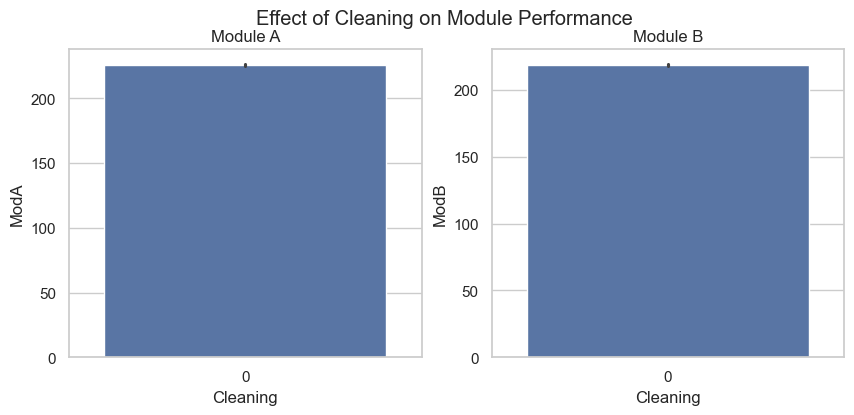

In [32]:
if "Cleaning" in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.barplot(x="Cleaning", y="ModA", data=df_clean, ax=axes[0])
    sns.barplot(x="Cleaning", y="ModB", data=df_clean, ax=axes[1])
    axes[0].set_title("Module A")
    axes[1].set_title("Module B")
    plt.suptitle("Effect of Cleaning on Module Performance")
    plt.show()
else:
    print("⚠️ No 'Cleaning' column found in dataset.")

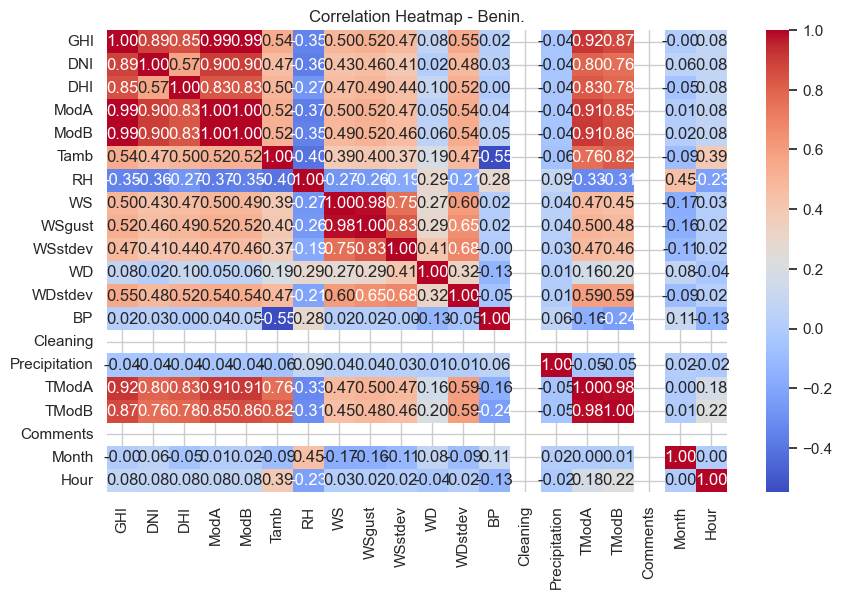

In [33]:
corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
#sns.heatmap(corr, cmap='coolwarm', annot=False)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap - Benin.")
plt.show()

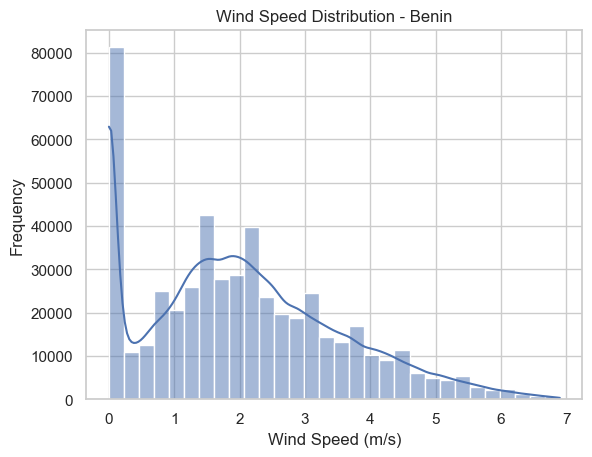

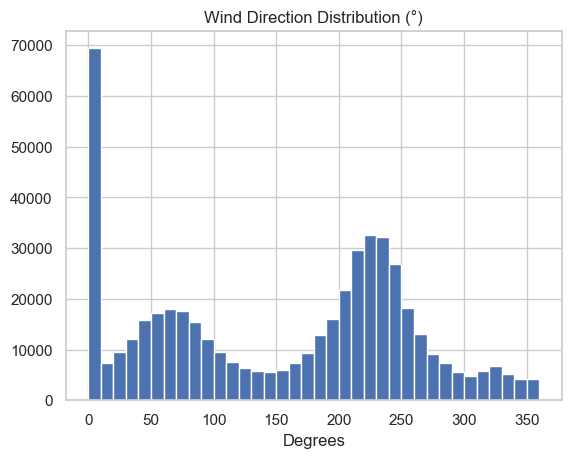

In [34]:
sns.histplot(df_clean["WS"], bins=30, kde=True)
plt.title("Wind Speed Distribution - Benin")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

if "WD" in df_clean.columns:
    df_clean["WD"].hist(bins=36)
    plt.title("Wind Direction Distribution (°)")
    plt.xlabel("Degrees")
    plt.show()
else:
    print("⚠️ No 'WD' column found in dataset.")

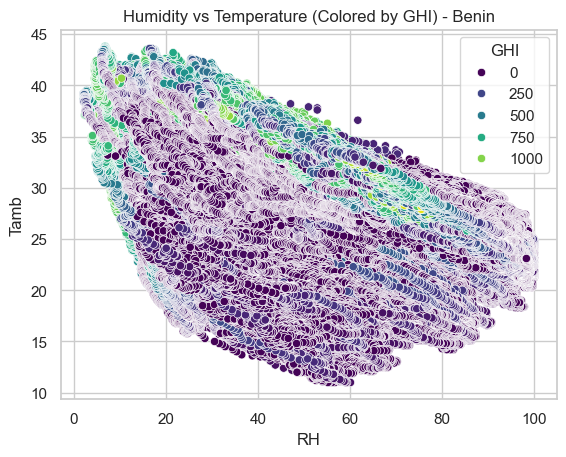

Correlation (Tamb vs GHI): 0.5385536816425912
Correlation (RH vs GHI): -0.3454033267617242


In [35]:
sns.scatterplot(x="RH", y="Tamb", hue="GHI", data=df_clean, palette="viridis")
plt.title("Humidity vs Temperature (Colored by GHI) - Benin")
plt.show()

print("Correlation (Tamb vs GHI):", df_clean['Tamb'].corr(df_clean['GHI']))
print("Correlation (RH vs GHI):", df_clean['RH'].corr(df_clean['GHI']))

In [36]:
os.makedirs("../data/clean", exist_ok=True)
df_clean.to_csv("../data/clean/benin-malanville-clean.csv", index=False)
print("✅ data/clean/benin-malanville-clean.csv")

✅ data/clean/benin-malanville-clean.csv
